<a href="https://colab.research.google.com/github/LucaLehigh/Lab-CSE337/blob/main/lab12_SAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 12: Soft Actor Critic

Train a Soft Actor-Critic (SAC) agent on HalfCheetah-v4,
track its learning curve, and compare the result with your previous RL algorithm.

We will learn to use the **stable_baselines3** library


## To start
Run the following code that solves **the Pendulum problem**

In [1]:
# Install dependencies
!pip install "stable-baselines3[extra]" "gymnasium[classic_control]"


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.2/187.2 kB 8.9 MB/s eta 0:00:00


The following code trains a full SAC agent — with two critics, entropy tuning, and replay buffer — out of the box

In [2]:
import gymnasium as gym
from stable_baselines3 import SAC

# Create environment
env = gym.make("Pendulum-v1")

# Create SAC model
model = SAC("MlpPolicy", env, verbose=1)

# Train the agent with N time steps
N = 4000
model.learn(total_timesteps=N)

Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.25e+03 |
| time/              |           |
|    episodes        | 4         |
|    fps             | 47        |
|    time_elapsed    | 16        |
|    total_timesteps | 800       |
| train/             |           |
|    actor_loss      | 17.6      |
|    critic_loss     | 0.258     |
|    ent_coef        | 0.813     |
|    ent_coef_loss   | -0.323    |
|    learning_rate   | 0.0003    |
|    n_updates       | 699       |
----------------------------------


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.43e+03 |
| time/              |           |
|    episodes        | 8         |
|    fps             | 44        |
|    time_elapsed    | 36        |
|    total_timesteps | 1600      |
| train/             |           |
|    actor_loss      | 44.1      |
|    critic_loss     | 0.134     |
|    ent_coef        | 0.646     |
|    ent_coef_loss   | -0.643    |
|    learning_rate   | 0.0003    |
|    n_updates       | 1499      |
----------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.28e+03 |
| time/              |           |
|    episodes        | 12        |
|    fps             | 44        |
|    time_elapsed    | 54        |
|    total_timesteps | 2400      |
| train/             |           |
|    actor_loss      | 62.9      |
|    critic_loss    

# Visualize the result

In [3]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import gymnasium as gym
from stable_baselines3 import SAC
from IPython.display import HTML

env = gym.make("Pendulum-v1", render_mode="rgb_array")


N_steps = 500

frames = []
obs, _ = env.reset()
for _ in range(N_steps):
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, truncated, info = env.step(action)
    frame = env.render()
    frames.append(frame)
    if done or truncated:
        obs, _ = env.reset()

env.close()

# Create matplotlib animation
fig = plt.figure()
img = plt.imshow(frames[0])

def animate(i):
    img.set_data(frames[i])
    return [img]

ani = animation.FuncAnimation(fig, animate, frames=len(frames), interval=30)

plt.close()
HTML(ani.to_html5_video())


/usr/local/lib/python3.12/dist-packages/pygame/pkgdata.py:25: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_stream, resource_exists
/usr/local/lib/python3.12/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.12/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.cloud')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-pa

## Exercise 1: Soft Actor-Critic on HalfCheetah
**Goal:**
Adapt the existing Soft Actor-Critic (SAC) implementation from the Pendulum-v1 environment to train and evaluate a SAC agent on the more challenging HalfCheetah-v4 task.

### Instructions

1. Adapt your code: Modify your previous SAC implementation so that it runs on the HalfCheetah-v4 environment from MuJoCo.

2. Reward Logger:
Implement a custom RewardLogger callback to record episode rewards during training (you will have to search online about how to create a class for logger).
After training, use the logged data to plot the learning curve (episode reward vs. timesteps).

3. Experimentation:
    * Compare the performance of SAC on HalfCheetah-v4 with your previous algorithm.
    * Adjust the entropy temperature parameter (ent_coef or target_entropy) and observe how this affects: Exploration behavior, Convergence speed, and Final performance.

Answer the following questions
1. Did SAC reach a higher average reward or converge faster than your previous method?

2. How did changing the temperature for entropy affect the performance and stability of learning?

3. Describe any differences you observed in exploration or motion behavior of the agent.


### Deliverables

* Python notebook or script containing:
    * The adapted SAC training code
    * The RewardLogger implementation
    * Learning curve plots for SAC and your previous algorithm
    * Comparison of different entropy temperature settings

* The answer of the questions above

In [4]:
!pip install gymnasium[mujoco]


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 107.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.5/243.5 kB 20.9 MB/s eta 0:00:00


In [5]:
from stable_baselines3.common.callbacks import BaseCallback

class RewardLogger(BaseCallback):
    def __init__(self):
        super().__init__()
        self.episode_rewards = []
        self.current_reward = 0

    def _on_step(self) -> bool:
        self.current_reward += self.locals["rewards"][0]  # single-env
        if self.locals.get("dones")[0]:
            self.episode_rewards.append(self.current_reward)
            self.current_reward = 0
        return True

env = gym.make("HalfCheetah-v4")
model = SAC("MlpPolicy", env, verbose=1)

logger = RewardLogger()
model.learn(total_timesteps=100_000, callback=logger)

model.save("sac_halfcheetah")
env.close()



/usr/local/lib/python3.12/dist-packages/gymnasium/envs/registration.py:512: DeprecationWarning: WARN: The environment HalfCheetah-v4 is out of date. You should consider upgrading to version `v5`.
  logger.deprecation(


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | -203     |
| time/              |          |
|    episodes        | 4        |
|    fps             | 39       |
|    time_elapsed    | 101      |
|    total_timesteps | 4000     |
| train/             |          |
|    actor_loss      | -32.8    |
|    critic_loss     | 1.61     |
|    ent_coef        | 0.314    |
|    ent_coef_loss   | -10.9    |
|    learning_rate   | 0.0003   |
|    n_updates       | 3899     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | -217     |
| time/              |          |
|    episodes        | 8        |
|    fps             | 39       |
|    time_elapsed    | 200      |
|    total_timesteps | 8000     |
| train/             |

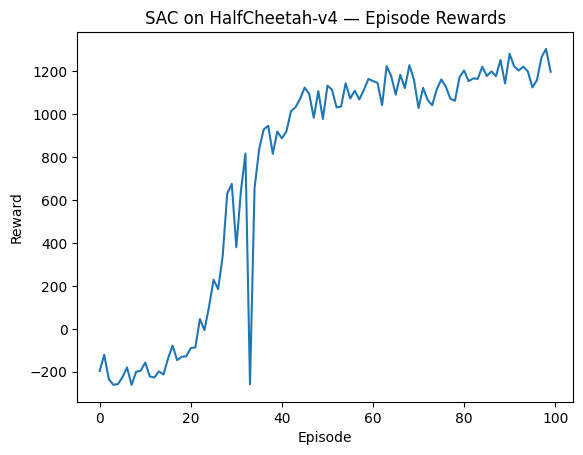

In [6]:
plt.plot(logger.episode_rewards)
plt.title("SAC on HalfCheetah-v4 — Episode Rewards")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.show()

Yes SAC reached a higher average reward and converged faster. The performance improved substantially within the first few dozen episodes compared to the previous method.

Changing the temperature for entropy lower made the policy more deterministic and helped it converge faster but the learning curves were a less stable compared to higher entropy which encouraged more exploration. Learning was slower but the returns were smoother and the agent was less likely to get stuck in bad behavior.

With higher entropy the agent explored more. Early motion was jerky and it tried lots of different limb movements and directions. As entropy was reduced and training progressed, the behavior became smoother and more focused on a consistent forward-running gait.